In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

data = load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
X = data["data"].copy()[ :, 2:4]# 2 columns to allow straightforward prediction visualization, 
                                # otherwise, e.g. in 3 dims, we need to visualize planes
y = data["target"].copy()

stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in stratSplit.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]
    
    y_train = y[train_index]
    y_test = y[test_index]

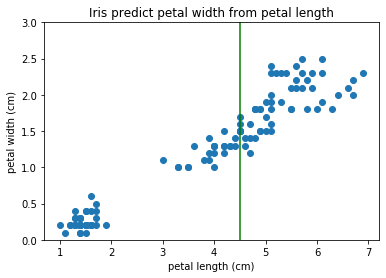

In [3]:
plt.scatter(X_train[:, 0], X_train[:, 1])#, c=y_train)
plt.plot([X_test[1,0],X_test[1,0]],[0,3],c="green")
plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Iris predict petal width from petal length")
plt.ylim(0,3)
plt.show()

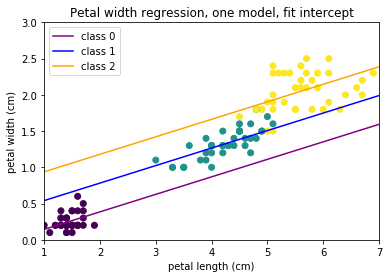

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=True,
                          normalize=False,
                          copy_X=False,
                          n_jobs=1)
#Also try creating one-hot vector instead of many classifications
lin_reg.fit(np.c_[X_train[:, 0],y_train], X_train[:, 1])

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
cs = ["purple","blue","orange"]
for i in range(3):
    xs = np.c_[np.linspace(1,7,20),i*np.ones(20)]
    plt.plot(xs[:,0],lin_reg.predict(xs),label="class "+str(i),c=cs[i])

plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Petal width regression, one model, fit intercept")
plt.ylim(0,3)
plt.xlim(1,7)
plt.legend()
plt.show()
#One model, with the same slope, different intercepts

In [5]:
lin_reg.coef_

array([0.24146428, 0.39702259])

In [6]:
#class offsets are constant
lin_reg.predict([[1,1]])-lin_reg.predict([[1,0]]),lin_reg.predict([[1,2]])-lin_reg.predict([[1,1]])

(array([0.39702259]), array([0.39702259]))

In [7]:
lin_reg.predict([[1,1]])

array([0.5412598])

In [8]:
lin_reg.intercept_

-0.09722708007127068

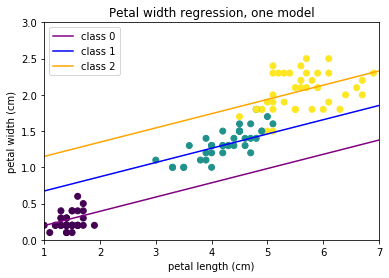

In [9]:
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(np.c_[X_train[:, 0],y_train], X_train[:, 1])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
cs = ["purple","blue","orange"]
for i in range(3):
    xs = np.c_[np.linspace(1,7,20),i*np.ones(20)]
    plt.plot(xs[:,0],lin_reg.predict(xs),label="class "+str(i),c=cs[i])

plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Petal width regression, one model")
plt.ylim(0,3)
plt.xlim(1,7)
plt.legend()
plt.show()

In [10]:
lin_reg.predict([[1,1]])# value after re-training model with fit intercept set to false

array([0.67359262])

In [11]:
lin_reg.score(X_test, y_test)
#No longer have accuracy
# R**2 = 1 - np.sum((y_test - lin_reg.predict(X_test))**2)/np.sum((y_test - np.mean(y_test))**2)
# scores from 1 (best) -> -inf

0.7810217336529274

In [12]:
#Taken the class out of the model and used it to create separate models
x_t = np.linspace(1,7,100)
lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_train[y_train==0][:, 0].reshape(-1,1),X_train[y_train==0][:, 1])
preds_1 = lin_reg_1.predict(x_t.reshape(-1,1))
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train[y_train==1][:, 0].reshape(-1,1),X_train[y_train==1][:, 1])
preds_2 = lin_reg_2.predict(x_t.reshape(-1,1))
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_train[y_train==2][:, 0].reshape(-1,1),X_train[y_train==2][:, 1])
preds_3 = lin_reg_3.predict(x_t.reshape(-1,1))

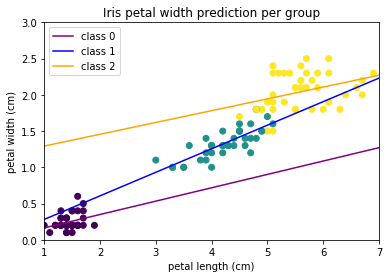

In [13]:
plt.title("Iris petal width prediction per group")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.plot(x_t, preds_1, c="purple",label="class 0")
plt.plot(x_t, preds_2, c="blue",label="class 1")
plt.plot(x_t, preds_3, c="orange",label="class 2")
plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.legend()
plt.ylim(0,3)
plt.xlim(1,7)
plt.show()
#Multiple models, different slopes, different intercepts

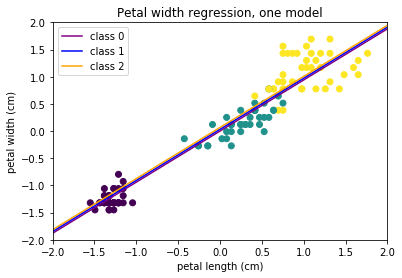

In [14]:
pipe = Pipeline([('ss_scaler',StandardScaler())])
X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(np.c_[X_train[:, 0],y_train], X_train[:, 1])

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
cs = ["purple","blue","orange"]
for i in range(3):
    xs = np.c_[np.linspace(-2,2,20),i*np.ones(20)]
    plt.plot(xs[:,0],lin_reg.predict(xs),label="class "+str(i),c=cs[i])

plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Petal width regression, one model")
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.legend()
plt.show()

In [15]:
lin_reg.coef_

array([0.93998193, 0.03291715])

In [16]:
lin_reg.intercept_

0.0

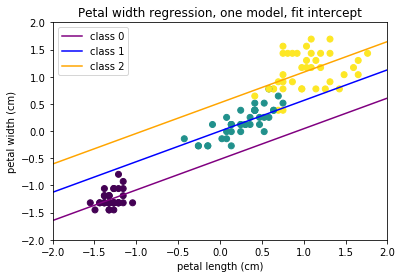

In [17]:
pipe = Pipeline([('ss_scaler',StandardScaler())])
X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(np.c_[X_train[:, 0],y_train], X_train[:, 1])

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
cs = ["purple","blue","orange"]
for i in range(3):
    xs = np.c_[np.linspace(-2,2,20),i*np.ones(20)]
    plt.plot(xs[:,0],lin_reg.predict(xs),label="class "+str(i),c=cs[i])

plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Petal width regression, one model, fit intercept")
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.legend()
plt.show()

In [18]:
lin_reg.coef_

array([0.56306906, 0.5198868 ])

In [19]:
lin_reg.intercept_

-0.5198868005432769